In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from submm.KIDs import resonance_fitting as res_fit
from submm.sample_data.abs_paths import abs_path_sample_data
from importlib import reload

# Single Resonator Fitting
## Load the Sample Data

In [2]:
data_path = os.path.join(abs_path_sample_data,
                         "Survey_Tbb20.000K_Tbath170mK_Pow-60dBm_array_temp_sweep_long.mat")
sample_data = loadmat(data_path)

## Extract the Frequency and Complex S21
From a VNA trace of the sample data

In [3]:
freq_ghz = sample_data['f'][:, 0]
freq_mhz = freq_ghz * 1.0e3
freq_hz = freq_ghz * 1.0e9
s21_complex = sample_data['z'][:, 0]
s21_mag = 20 * np.log10(np.abs(s21_complex))

## Plot the sample data

Text(0, 0.5, 'Magnitude (dB)')

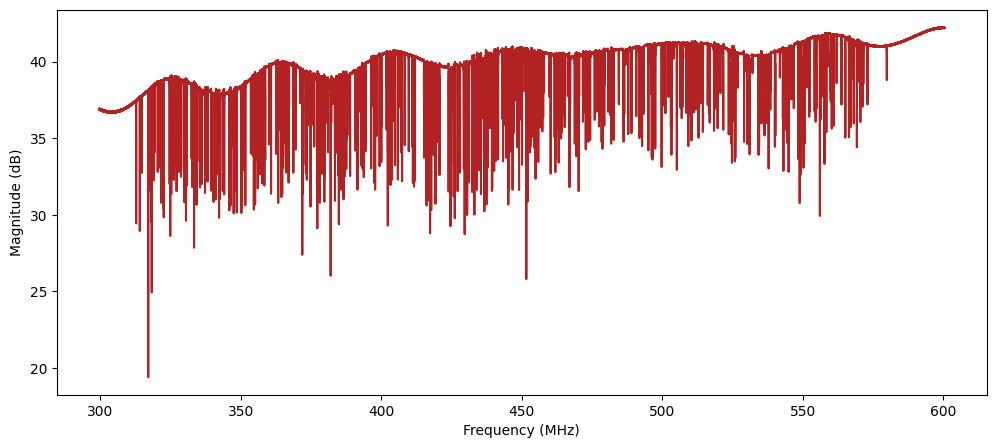

In [4]:
plt.figure(figsize = (12,5))
plt.plot(freq_mhz, s21_mag, color='firebrick')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude (dB)')

## Select a single resonator and plot

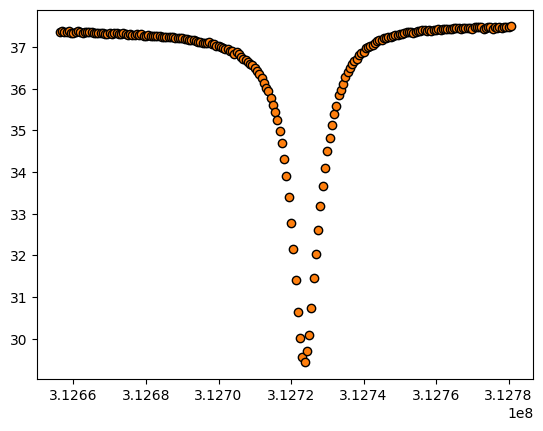

In [5]:
freq_hz_res1 = freq_hz[21050: 21250]
freq_mhz_res1 = freq_hz[21050: 21250]
s21_complex_res1 = s21_complex[21050: 21250]
s21_mag_res1 = s21_mag[21050: 21250]
plt.figure()
plt.plot(freq_mhz_res1, s21_mag_res1, color='C1', ls='None', marker='o',mec = "k")

## Run the fitter and get the results dictionary
Performance Note: Did you measure the cable delay parameter (tau), separately?<br>
You can force the fitter to use your value by setting the keyword tau (ie tau = 50e-9)

In [6]:
results = res_fit.fit_nonlinear_iq(freq_hz_res1, s21_complex_res1)

default bounds used
default initial guess used
Resonator at 312.72 MHz
     |                             Variables fit                           |Derived variables|
     | fr (MHz)|   Qr   | amp | phi  | a   |   i0     |   q0     | tau (ns)|   Qi   |   Qc   |
Guess| 312.7237|   21755| 0.61|  0.00| 0.00|  6.44E+01| -3.83E+01|   3.00  |   55254|   35882|
Fit  | 312.7256|   21268| 0.60| -0.14| 0.10|  6.38E+01| -3.90E+01|  73.75  |   53681|   35224|


## Plot the resonator fit results
### Complex

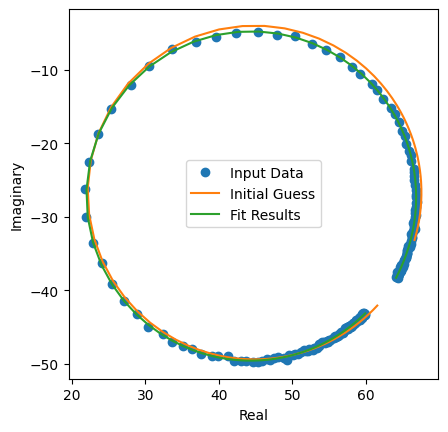

In [7]:
plt.figure()
plt.axes().set_aspect('equal')
plt.plot(np.real(s21_complex_res1), np.imag(s21_complex_res1),'o',label = "Input Data")
plt.plot(np.real(results['x0_result']),np.imag(results['x0_result']),label = "Initial Guess")
plt.plot(np.real(results['fit_result']),np.imag(results['fit_result']),label = "Fit Results")
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

### Now run the fitter that fits in Magnitude space
This fitter is somewhat similar but you no longer have to worry cable delay<br>
and this fitter allows a linear slope in S21

In [8]:
results_mag = res_fit.fit_nonlinear_mag(freq_hz_res1, s21_complex_res1)

default bounds used
default initial guess used
Resonator at 312.72 MHz
     |                       Variables fit                       |Derived variables|
     | fr (MHz)|   Qr   | amp | phi  | a   |   b0     |   b1     |   Qi   |   Qc   |
Guess| 312.7237|   21755| 0.61|  0.00| 0.00|  5.44E+03|  3.81E+05|   55254|   35882|
Fit  | 312.7257|   21262| 0.60| -0.14| 0.10|  5.60E+03|  3.29E+04|   53766|   35171|


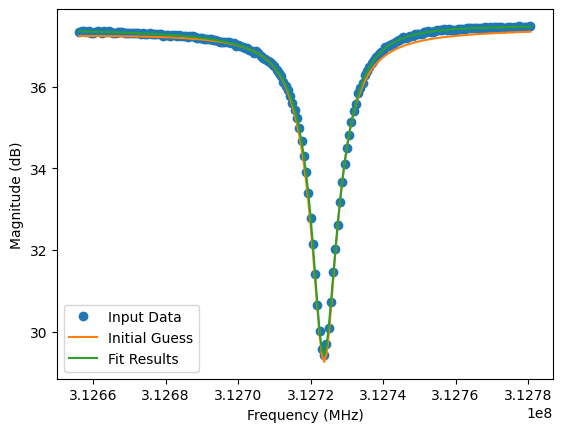

In [9]:
plt.figure()
plt.plot(freq_mhz_res1, s21_mag_res1, 'o', label="Input Data")
plt.plot(freq_mhz_res1,20*np.log10(results_mag['x0_result']),label="Initial Guess")
plt.plot(freq_mhz_res1,20*np.log10(results_mag['fit_result']),label = "Fit Results")
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude (dB)')
plt.legend()